In [72]:
#Homework 1 by Om Gaikwad

import numpy as np
import matplotlib.pyplot as plt
#print(plt.style.available)

plt.style.use('seaborn-v0_8-whitegrid')

# Function to generate data
def generate_data(noise_scale, number_of_samples):
    x = 35 * (np.random.rand(number_of_samples, 1) - 0.7)
    y = 5 * x + 24 * x**2 + 7 * x**3 + noise_scale * np.random.rand(number_of_samples, 1)
    return x.flatten(), y.flatten()

# Function to fit polynomial and compute MSE
def fit_polynomial(x, y, order):
    coeffs = np.polyfit(x, y, order)
    y_pred = np.polyval(coeffs, x)
    mse = np.mean((y - y_pred) ** 2)
    return coeffs, mse, y_pred


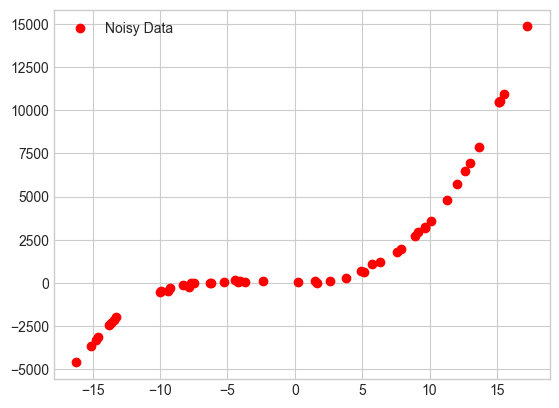

In [73]:
# Provided functions to generate data 
noise_scale= 100
number_of_samples= 50
x =  35*(np.random.rand(number_of_samples, 1) -0.5)
y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro', label='Noisy Data')
plt.legend()

Question 1: Please plot the noisy data and the polynomial you found (in the same figure). You can use any value of m selected from 2, 3, 4, 5, 6.

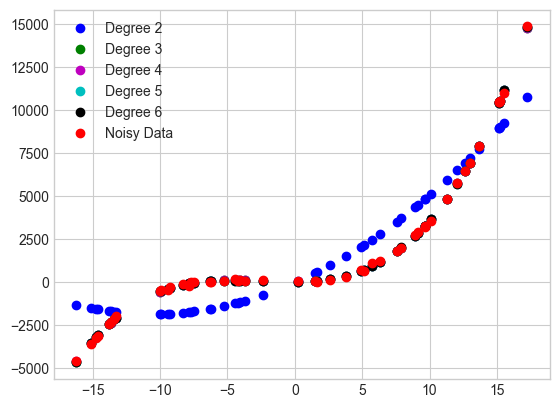

In [74]:
# Part 1: Fitting polynomials of orders 1 to 6 and plot results

fitted = []
colors = ['bo', 'go', 'mo', 'co', 'ko']


for i, color in zip(range(2, 7), colors):
    z = np.polyfit(x.flatten(), y.flatten(), i)
    p = np.poly1d(z)
    fitted.append(p(x.flatten()))
    plt.plot(x.flatten(), fitted[i-2].flatten(), color, label=f"Degree {i}")

plt.plot(x, y, 'ro', label="Noisy Data")
plt.legend()
plt.show()


Question 2: Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6 respectively. Identify the best choice of m.

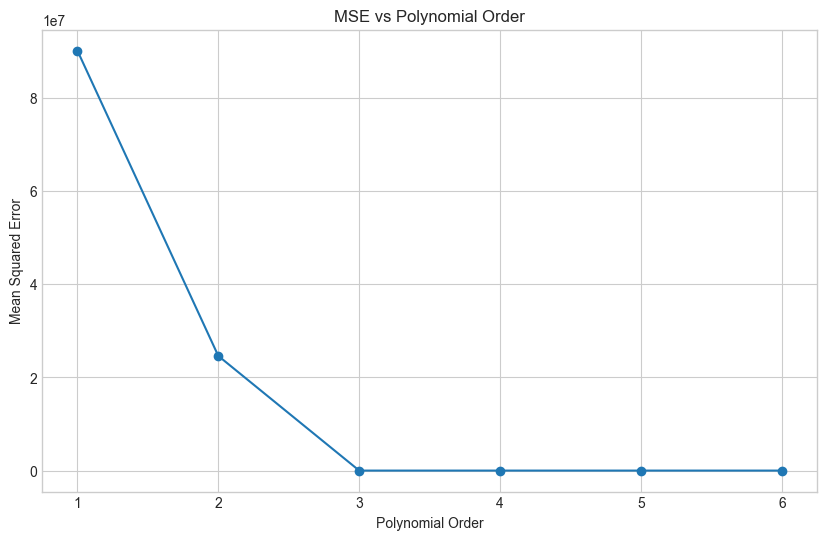

In [75]:

#Get plot for m values

orders = [1, 2, 3, 4, 5, 6]
mse_values = []
noise_scale = 80
number_of_samples = 70
x, y = generate_data(noise_scale, number_of_samples)
plt.figure(figsize=(10, 6))
for m in orders:
    coeffs, mse, y_pred = fit_polynomial(x, y, m)
    mse_values.append(mse)


# Plot MSE vs Order
plt.plot(orders, mse_values, marker='o', linestyle='-')
plt.xlabel('Polynomial Order')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Order')
plt.show()



In [76]:
# Best polynomial order
best_m = orders[np.argmin(mse_values)]
print(f'Best polynomial order based on MSE: {best_m}')

Best polynomial order based on MSE: 6


Question 3: Change variable noise scale to 150, 250, 450, 750, 950 respectively, re-run the algorithm and plot the polynomials with the best m found in ii. Discuss the impact of increasing noise on the accuracy and reliability of the polynomial parameters. How does the model's performance degrade with increasing noise?

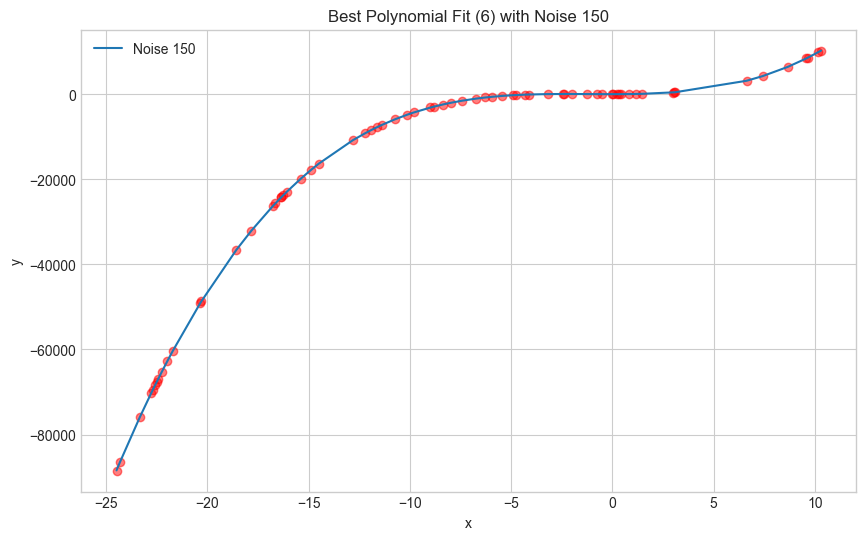

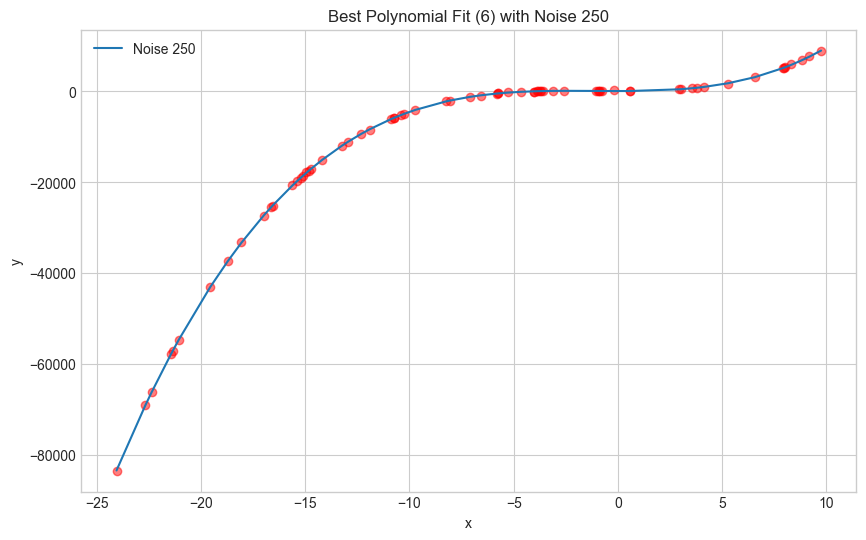

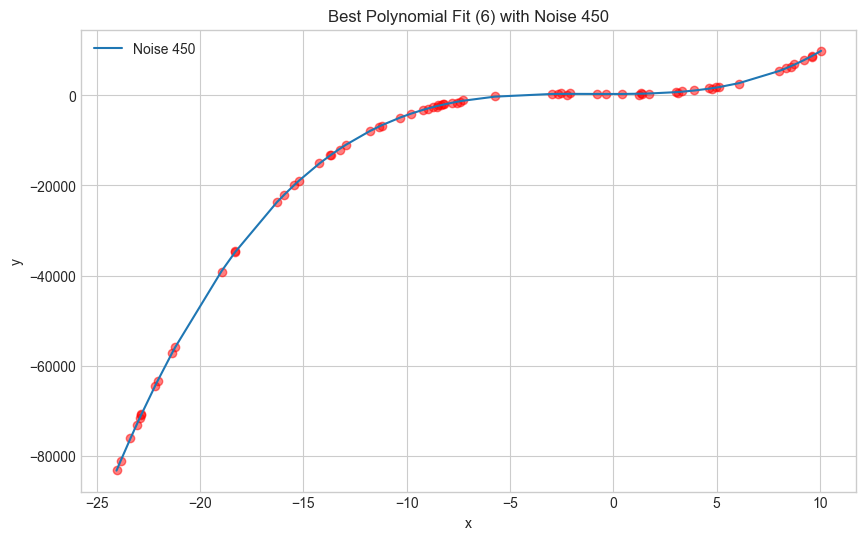

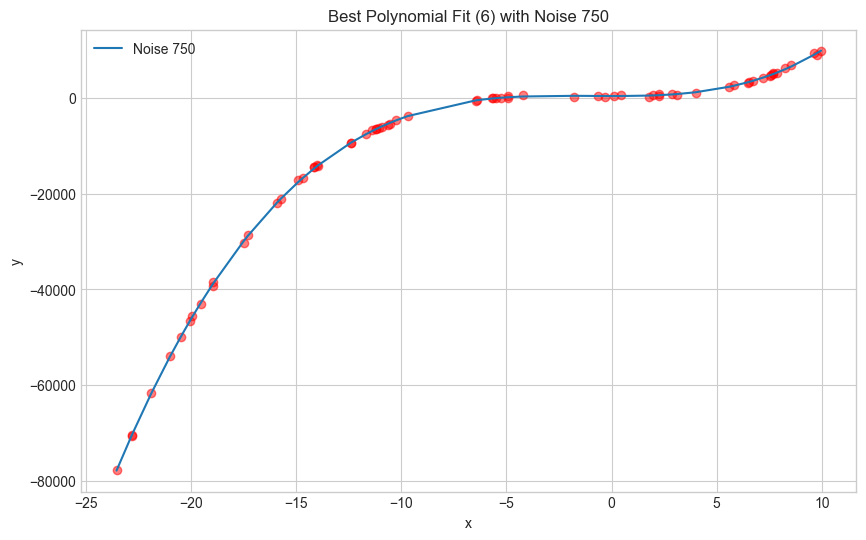

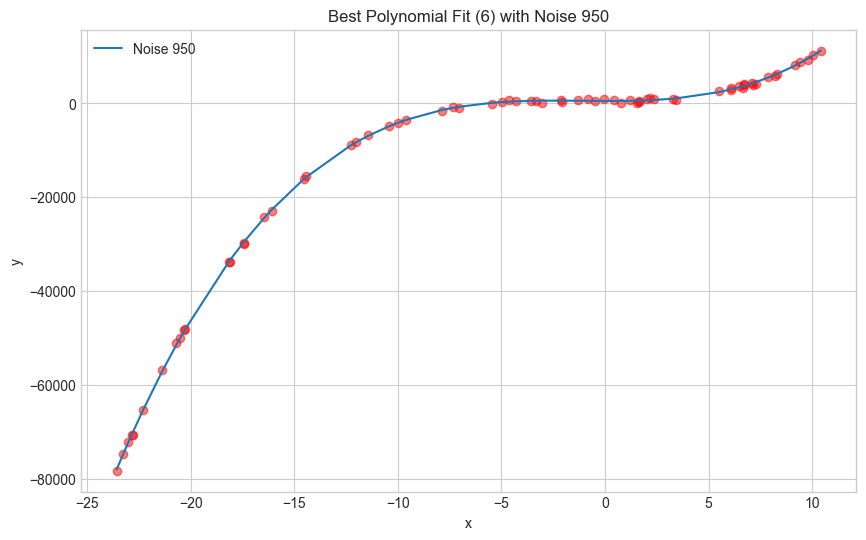

In [77]:
noise_levels = [150, 250, 450, 750, 950]
for noise in noise_levels:
    x, y = generate_data(noise, number_of_samples)
    coeffs, mse, y_pred = fit_polynomial(x, y, best_m)
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='red', alpha=0.5)
    plt.plot(np.sort(x), np.polyval(coeffs, np.sort(x)), label=f'Noise {noise}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Best Polynomial Fit ({best_m}) with Noise {noise}')
    plt.legend()
    plt.show()

As noise increases, data points deviate more from the true polynomial, making it harder to identify the underlying trend. Higher noise leads to overfitting in high-order polynomials, causing poor generalization. The estimated polynomial coefficients become unstable, fluctuating significantly with small dataset changes. Mean Squared Error (MSE) rises, indicating increasing deviation from the true function. With low noise, the model closely follows the true polynomial, but at high noise, the fit becomes unreliable. Excessive noise causes the model to capture randomness rather than meaningful patterns. To maintain accuracy, choosing an optimal polynomial order is crucial to balance bias and variance.

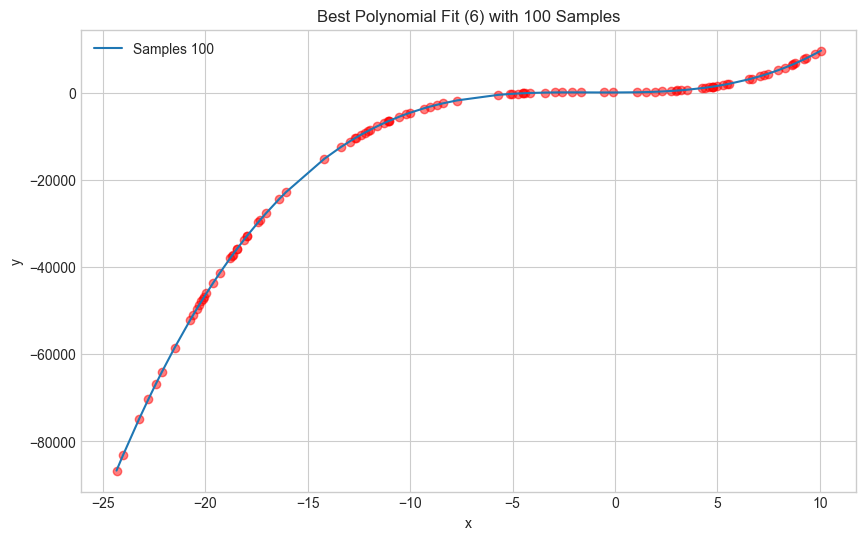

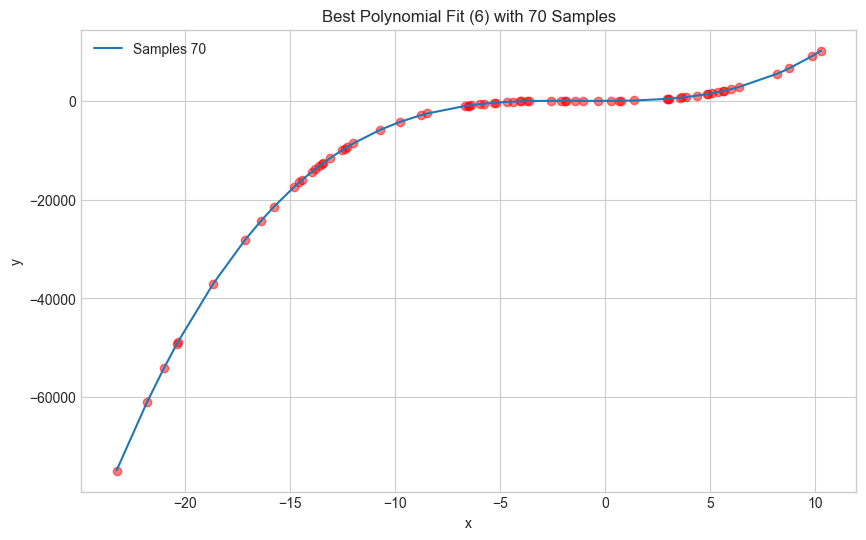

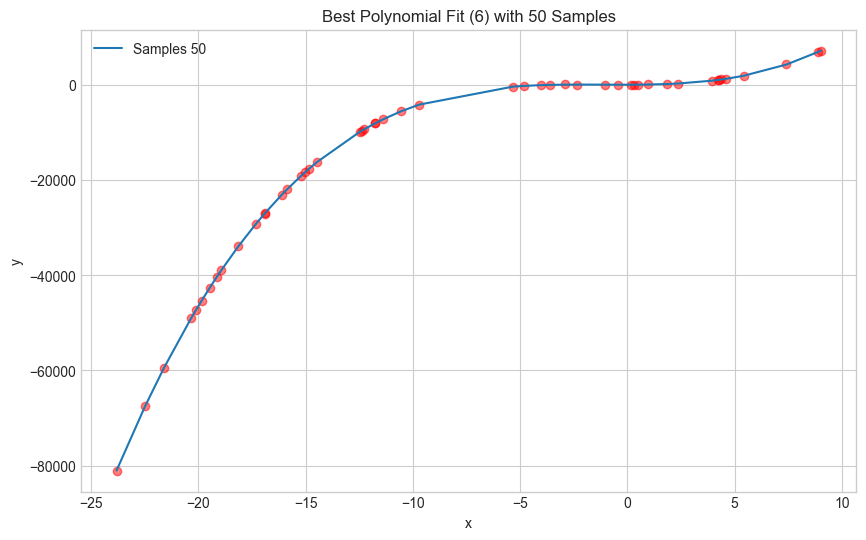

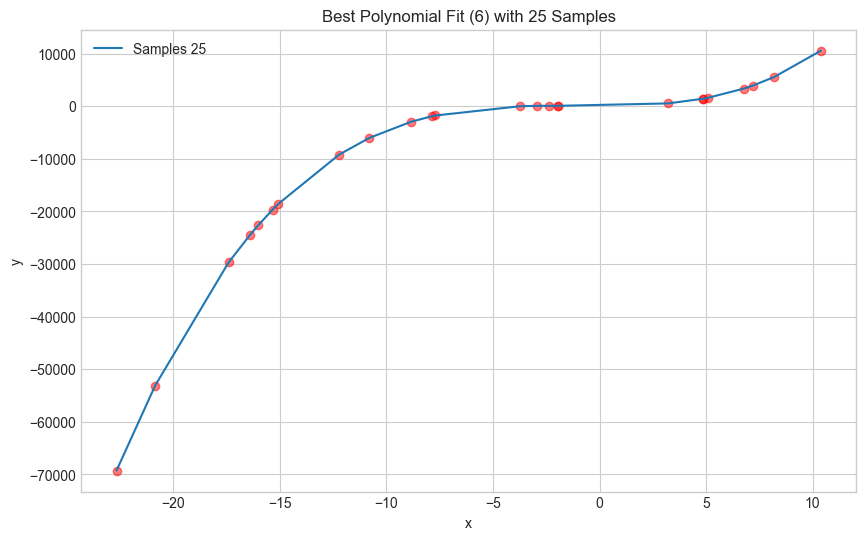

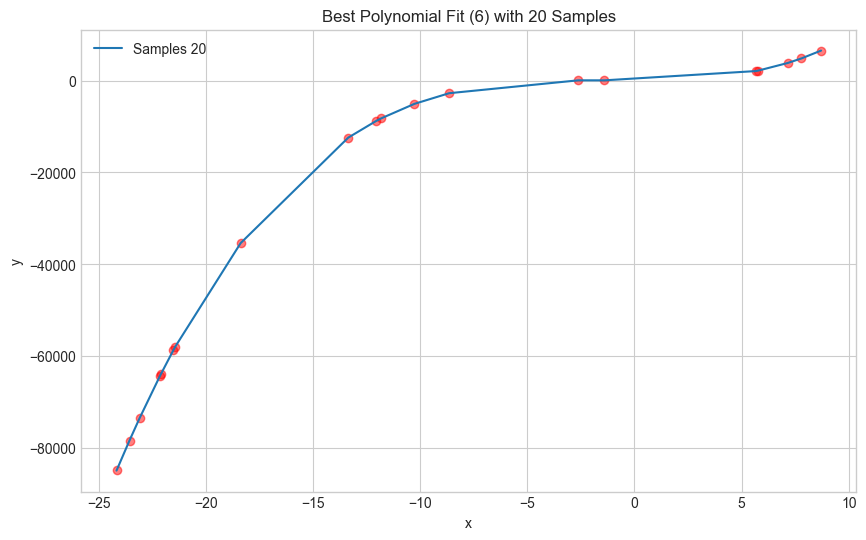

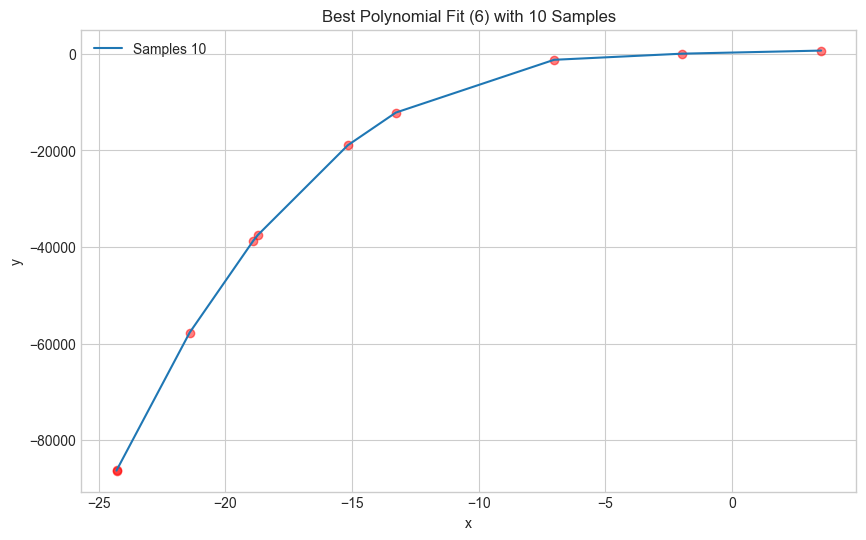

In [78]:
sample_sizes = [100, 70, 50, 25, 20, 10]

for samples in sample_sizes:
    x, y = generate_data(noise_scale, samples)
    coeffs, mse, y_pred = fit_polynomial(x, y, best_m)
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='red', alpha=0.5)
    plt.plot(np.sort(x), np.polyval(coeffs, np.sort(x)), label=f'Samples {samples}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Best Polynomial Fit ({best_m}) with {samples} Samples')
    plt.legend()
    plt.show()

Larger sample sizes improve accuracy by capturing the true polynomial relationship and reducing estimation errors. More data prevents overfitting, ensuring better generalization, while smaller datasets make the model sensitive to noise and outliers. With fewer samples, high-order polynomials may overfit, leading to unreliable predictions. As sample size increases, Mean Squared Error (MSE) stabilizes, making parameter estimates more reliable. An optimal sample size is crucial for balancing model complexity and accuracy.